In [46]:
import networkx as nx
import itertools as it
from scipy.optimize import minimize
def pairs(li):
    return [(li[i],li[(i+1)%len(li)]) for i in range(len(li))]
import matplotlib.pyplot as plt


In [47]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
g=nx.Graph()

In [49]:
list(g.edges())

[]

In [50]:
class NBQP:
    def __init__(self, ingraph, rotation,coloring=None):
        self.graph=ingraph
        self.rotation = rotation
        self.nnum=self.graph.number_of_nodes()
        self.quads=self.compute_quads()
        self.coloring=coloring
        self.prevdata=None
    def compute_quads(self):
     #   print("computing quads",self.rotation)
        quadslist=set()
        for v,neig in self.rotation.items():
           # print(v,neig)
            for w1,w2 in pairs(neig):
                v2ind=(self.rotation[w1].index(v)+1)%len(self.rotation[w1])
                v2=self.rotation[w1][v2ind]
                #start with min and newquad[1] is followed by newquad[3] in the rotation of newquad[0] 
                newquad=[v,w1,v2,w2]
                
                start=np.argmin(newquad)
                if start%2==0:
                    ordered=tuple(newquad[start:]+newquad[:start])
                    #print('haho',v,w1,w2,self.rotation[w1],ordered)
                    quadslist.add(ordered)
        return quadslist

    def diagonal_list(self):
        return [(quad[0],quad[2]) for quad in self.quads]+[(quad[1],quad[3]) for quad in self.quads]
    def diag_graph(self):
        G=nx.Graph()
        G.add_edges_from(self.diagonal_list())
        return G
    
    def __repr__(self):
        return "NBQP graph:%s rotation:%s quads:%s cols:%s" % (list(self.graph.edges), self.rotation, self.quads,self.coloring)
    
    def __str__(self):
        return "NBQP graph:%s rotation:%s quads:%s cols:%s" % (list(self.graph.edges), self.rotation, self.quads,self.coloring)
    

In [51]:
k4=nx.Graph()
k4.add_edges_from([(0, 1), (0, 2),(0,3), (1, 2), (1, 3),(2, 3)])
q4rotation={0:(1,3,2),1:(0,2,3),2:(0,3,1),3:(0,1,2)}
k4coloring={0:0,1:1,2:2,3:3}
q4=NBQP(k4,q4rotation,k4coloring)
print(q4)


NBQP graph:[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)] rotation:{0: (1, 3, 2), 1: (0, 2, 3), 2: (0, 3, 1), 3: (0, 1, 2)} quads:{(0, 3, 1, 2), (0, 2, 3, 1), (0, 1, 2, 3)} cols:{0: 0, 1: 1, 2: 2, 3: 3}


In [52]:
q4.diagonal_list()

[(0, 1), (0, 3), (0, 2), (3, 2), (2, 1), (1, 3)]

In [53]:

def diagonal_graph(nbqp):
    
    pass

def split(q,a,b1,b2):
    #q is an nbqp, we split a at b1b2
    newgraph=q.graph.copy()
    rotation=q.rotation
    rota=rotation[a]
    i1=rota.index(b1)
    i2=rota.index(b2)
    #legyen b1 az ami az a rotationjeben eloszor jon, listás értelemben
    if i2==min(i1,i2):
        b1,b2=b2,b1
    i1,i2=min(i1,i2),max(i1,i2)
    
    
    rotb1=rotation[b1]
    rotb2=rotation[b2]
    
    
    n1=rota[i1+1:i2]
    n2=rota[i2+1:]+rota[:i1]
    
    #print("n1n2",n1,n2)
    newrot=rotation.copy()
    
    del newrot[a]
    #print('a',newrot)
    if 0 not in newrot.keys():
        newind1=0
    else:
        newind1=min(i+1 for i in newrot.keys() if i+1 not in newrot.keys() )
    newrot[newind1]=()
    
    newind2=min(i+1 for i in newrot.keys() if i+1 not in newrot.keys() )
  #  print('new indices:',newind1,newind2)
    #fixgraph
    newgraph.remove_node(a)
    newgraph.add_edges_from([(newind1,x) for x in n1])
    newgraph.add_edges_from([(newind2,x) for x in n2])
    newgraph.add_edges_from([(newind1,b1),(newind1,b2)])
    newgraph.add_edges_from([(newind2,b1),(newind2,b2)])

    
    #fux rot
    
    newrot[newind1]=tuple([b1]+list(n1)+[b2])
    newrot[newind2]=tuple([b2]+list(n2)+[b1])
    ainb1=rotb1.index(a)
    ainb2=rotb2.index(a)
    newrotb1=rotb1[:ainb1]+(newind2,newind1)+rotb1[ainb1+1:]
    newrotb2=rotb2[:ainb2]+(newind1,newind2)+rotb2[ainb2+1:]
    newrot[b1]=tuple(newrotb1)
    newrot[b2]=tuple(newrotb2)
#[4 if x==1 else x for x in a]
    
    #fix n1n2 rotation...
    for v in n1:
        newrot[v]=tuple([newind1 if x==a else x for x in rotation[v]])
    for v in n2:
        newrot[v]=tuple([newind2 if x==a else x for x in rotation[v]])
    newcoloring=None
    if q.coloring:
        newcoloring={}
        for v in newgraph.nodes:
            if v==newind1 or v==newind2:
                newcoloring[v]=q.coloring[a]
            else:
                newcoloring[v]=q.coloring[v]
    
    return NBQP(newgraph,newrot,newcoloring)

print(split(q4,0,1,3))

NBQP graph:[(1, 2), (1, 3), (1, 0), (1, 4), (2, 3), (2, 4), (3, 0), (3, 4)] rotation:{1: (4, 0, 2, 3), 2: (4, 3, 1), 3: (0, 4, 1, 2), 0: (1, 3), 4: (3, 2, 1)} quads:{(1, 2, 4, 3), (1, 3, 2, 4), (0, 3, 4, 1), (0, 1, 2, 3)} cols:{1: 1, 2: 2, 3: 3, 4: 0, 0: 0}


In [13]:
q5=split(q4,0,1,3)

q6list=[]
print('q5',q5)
print(split(q5,1,0,3))

q5 NBQP graph:[(1, 2), (1, 3), (1, 0), (1, 4), (2, 3), (2, 4), (3, 0), (3, 4)] rotation:{1: (4, 0, 2, 3), 2: (4, 3, 1), 3: (0, 4, 1, 2), 0: (1, 3), 4: (3, 2, 1)} quads:{(1, 2, 4, 3), (1, 3, 2, 4), (0, 3, 4, 1), (0, 1, 2, 3)} cols:{1: 1, 2: 2, 3: 3, 4: 0, 0: 0}
NBQP graph:[(2, 3), (2, 4), (2, 1), (3, 0), (3, 4), (3, 1), (3, 5), (4, 5), (0, 1), (0, 5)] rotation:{2: (4, 3, 1), 3: (0, 4, 1, 5, 2), 0: (5, 1, 3), 4: (3, 2, 5), 1: (0, 2, 3), 5: (3, 4, 0)} quads:{(2, 4, 5, 3), (0, 5, 3, 1), (1, 2, 4, 3), (0, 3, 4, 5), (0, 1, 2, 3)} cols:{2: 2, 3: 3, 4: 0, 0: 0, 1: 1, 5: 1}


In [14]:
collection={}
collection[4]={'nbqp_list':[q4],'graph_list':[q4.graph]}

In [17]:
collection[5]={'nbqp_list':[],'graph_list':[]}
for nbqp in collection[4]['nbqp_list']:
    g=nbqp.graph
    rot=nbqp.rotation
    for v in list(g.nodes):
        for w1,w2 in it.combinations(rot[v],2):
            newnbqp=split(nbqp,v,w1,w2)
            newnbqp.prevdata=(nbqp,v,w1,w2)
            found=False
            for gr in collection[5]['graph_list']:
                if nx.is_isomorphic(newnbqp.graph, gr):
                    found=True
                    break
            if not found:
                
                collection[5]['nbqp_list'].append(newnbqp)
                collection[5]['graph_list'].append(newnbqp.graph)
                
                
            
    

In [ ]:
#calculates next level
for j in [6,7,8,9,10]:
    size=j
    collection[size]={'nbqp_list':[],'graph_list':[]}
    for nbqp in collection[size-1]['nbqp_list']:
        g=nbqp.graph
        rot=nbqp.rotation
        for v in list(g.nodes):
            for w1,w2 in it.combinations(rot[v],2):
                newnbqp=split(nbqp,v,w1,w2)
                newnbqp.prevdata=(nbqp,v,w1,w2)
                found=False
                for gr in collection[size]['graph_list']:
                    if nx.is_isomorphic(newnbqp.graph, gr):
                        found=True
                        break
                if not found:
                    collection[size]['nbqp_list'].append(newnbqp)
                    collection[size]['graph_list'].append(newnbqp.graph)


In [42]:
# calculates next level efficiently
for j in [6, 7, 8, 9, 10,11]:
    size = j
    collection[size] = {'nbqp_list': [], 'graph_list': []}
    graph_hashes = set()
    for nbqp in collection[size - 1]['nbqp_list']:
        g = nbqp.graph
        rot = nbqp.rotation
        for v in list(g.nodes):
            for w1, w2 in it.combinations(rot[v], 2):
                newnbqp = split(nbqp, v, w1, w2)
                newnbqp.prevdata = (nbqp, v, w1, w2)
                gr = newnbqp.graph
                gr_hash = nx.weisfeiler_lehman_graph_hash(gr)
                if gr_hash not in graph_hashes:
                    collection[size]['nbqp_list'].append(newnbqp)
                    collection[size]['graph_list'].append(gr)
                    graph_hashes.add(gr_hash)


In [43]:
for i in [4,5,6,7,8,9,10,11]:
    print(i,len(collection[i]['graph_list']))

4 1
5 1
6 4
7 14
8 58
9 266
10 1360
11 7232


In [44]:
from pysat.formula import IDPool
from pysat.solvers import Solver

def check_coloring_orientation(graph, k):
    """
    graph: dict {u: [neighbors]} adjacency list
    k: number of colors to try
    returns: True if such a coloring+orientation exists, else False
    """
    vpool = IDPool()

    def col(v, c):
        return vpool.id(("col", v, c))

    def orient(u, v):
        return vpool.id(("orient", u, v))  # meaning edge u->v

    with Solver(name="glucose3") as solver:
        # 1. each vertex has exactly one color
        for v in graph:
            solver.add_clause([col(v, c) for c in range(k)])
            for c1 in range(k):
                for c2 in range(c1+1, k):
                    solver.add_clause([-col(v, c1), -col(v, c2)])

        # 2. adjacent vertices different colors
        for u in graph:
            for v in graph[u]:
                if u < v:  # avoid double
                    for c in range(k):
                        solver.add_clause([-col(u, c), -col(v, c)])

        # 3. edge orientation: exactly one direction
        for u in graph:
            for v in graph[u]:
                if u < v:
                    solver.add_clause([orient(u, v), orient(v, u)])
                    solver.add_clause([-orient(u, v), -orient(v, u)])

        # 4. outgoing neighbors of each vertex must share same color
        for u in graph:
            for v in graph[u]:
                for w in graph[u]:
                    if v < w:  # avoid double
                        for c1 in range(k):
                            for c2 in range(k):
                                if c1 != c2:
                                    # if u->v and u->w then color(v)=color(w)
                                    solver.add_clause([-orient(u, v), -orient(u, w), -col(v, c1), -col(w, c2)])

        sat = solver.solve()
        if not sat:
            return None, None
        model = solver.get_model()
        coloring = {}
        orientation = {}
        for v in graph:
            for c in range(k):
                if col(v, c) in model and model[model.index(col(v, c))] > 0:
                    coloring[v] = c
        for u in graph:
            for v in graph[u]:
                if orient(u, v) in model and model[model.index(orient(u, v))] > 0:
                    orientation[(u, v)] = True
                elif orient(v, u) in model and model[model.index(orient(v, u))] > 0:
                    orientation[(u, v)] = False
        return coloring, orientation
        return sat


Graph 45 of size 9 is colorable with 6 colors


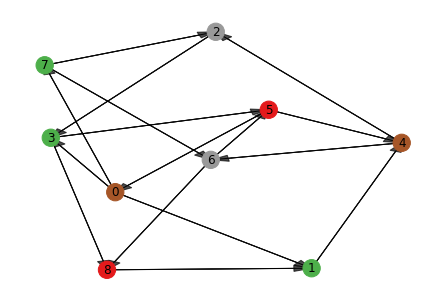

Graph 49 of size 10 is colorable with 6 colors


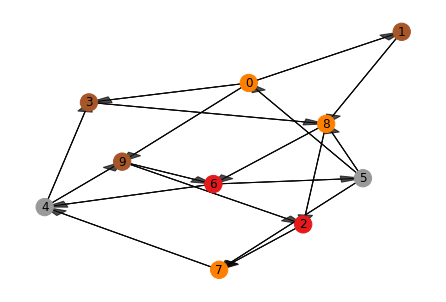

Graph 56 of size 10 is colorable with 6 colors


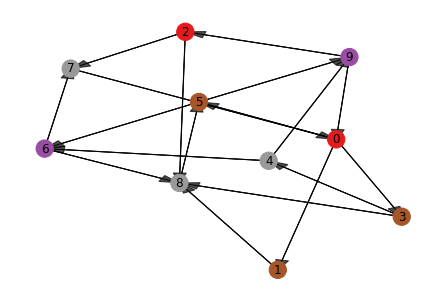

Graph 407 of size 10 is colorable with 6 colors


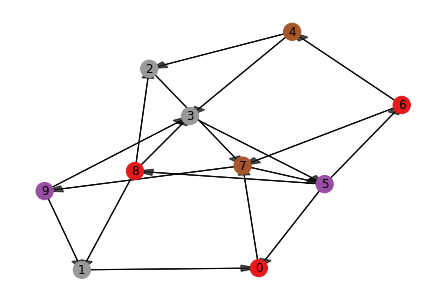

Graph 463 of size 10 is colorable with 6 colors


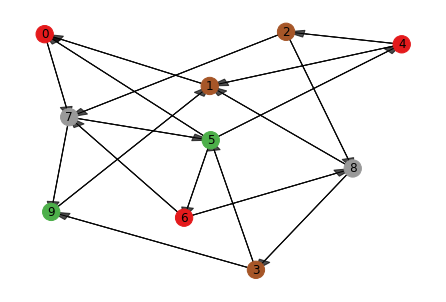

Graph 466 of size 10 is colorable with 6 colors


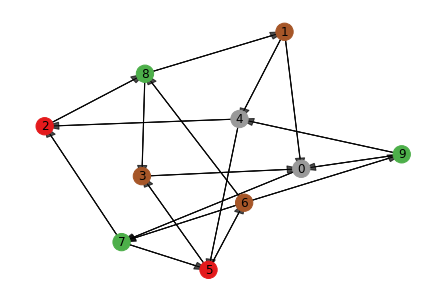

Graph 496 of size 10 is colorable with 6 colors


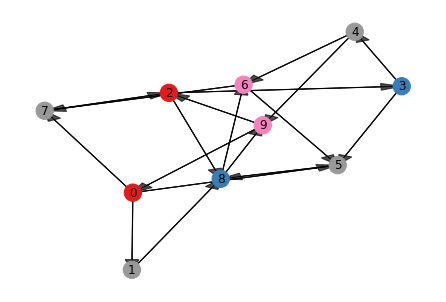

Graph 257 of size 11 is colorable with 6 colors


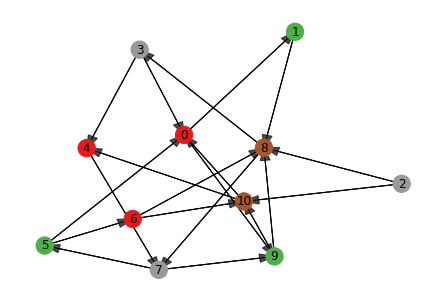

Graph 258 of size 11 is colorable with 6 colors


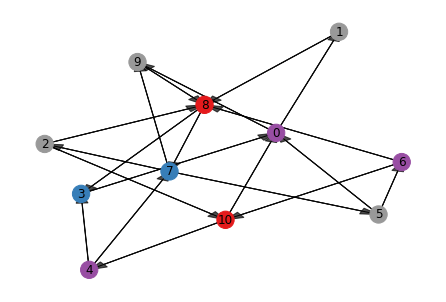

Graph 443 of size 11 is colorable with 6 colors


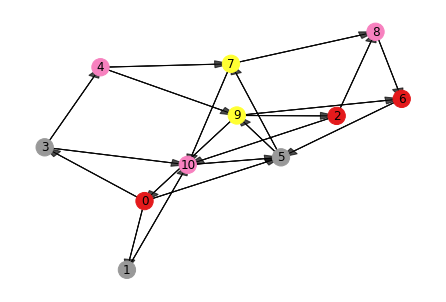

Graph 451 of size 11 is colorable with 6 colors


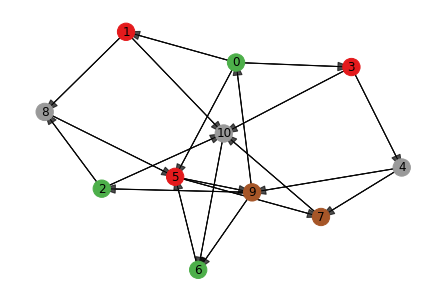

Graph 452 of size 11 is colorable with 6 colors


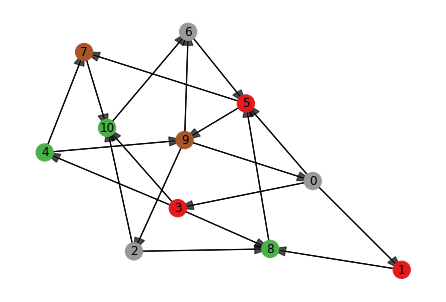

Graph 457 of size 11 is colorable with 6 colors


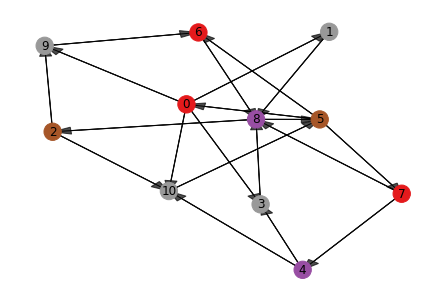

Graph 458 of size 11 is colorable with 6 colors


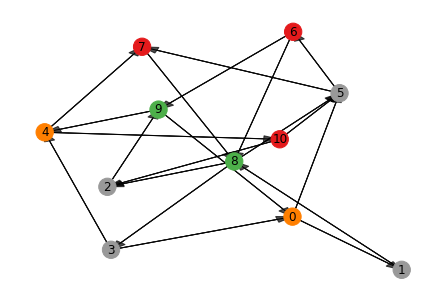

Graph 467 of size 11 is colorable with 6 colors


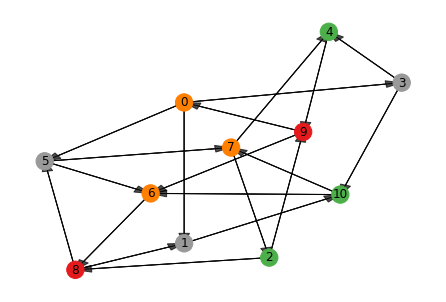

Graph 468 of size 11 is colorable with 6 colors


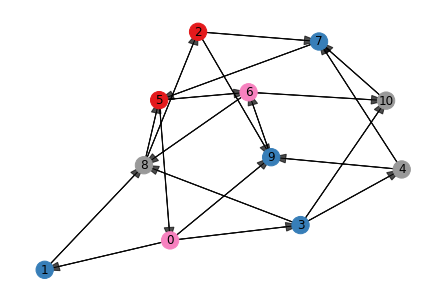

Graph 470 of size 11 is colorable with 6 colors


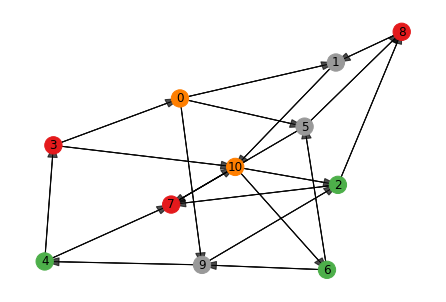

Graph 471 of size 11 is colorable with 6 colors


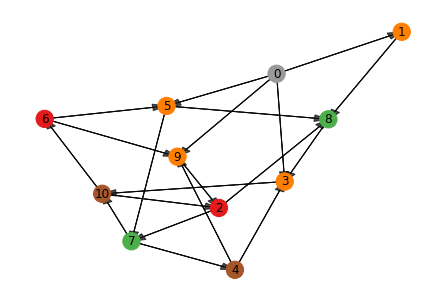

Graph 516 of size 11 is colorable with 6 colors


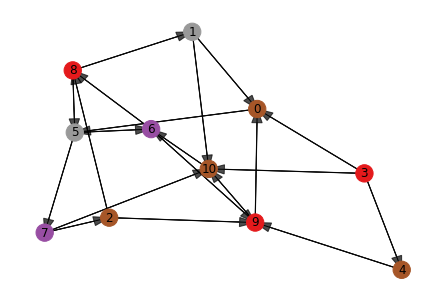

Graph 517 of size 11 is colorable with 6 colors


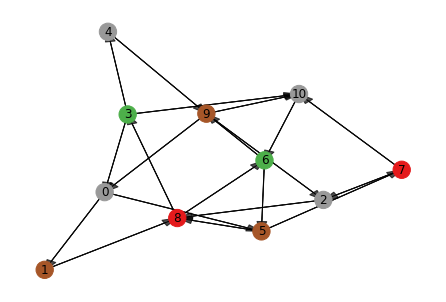

Graph 612 of size 11 is colorable with 6 colors


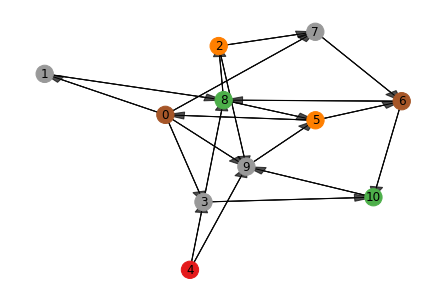

Graph 613 of size 11 is colorable with 6 colors


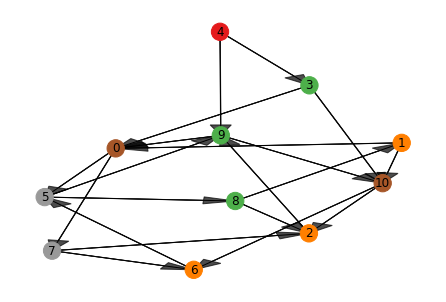

Graph 614 of size 11 is colorable with 6 colors


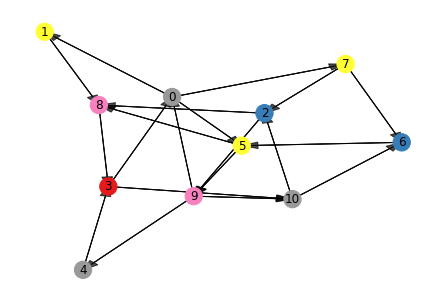

Graph 677 of size 11 is colorable with 6 colors


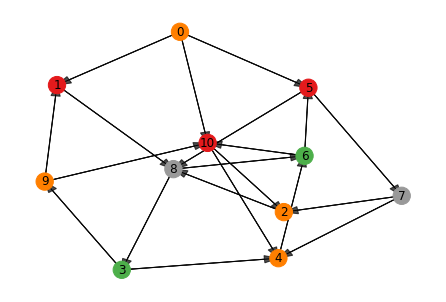

Graph 684 of size 11 is colorable with 6 colors


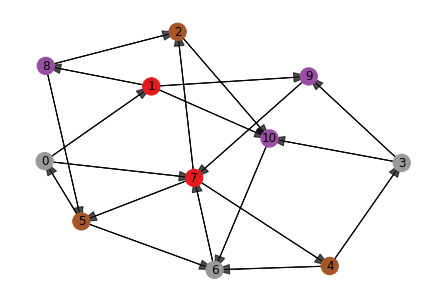

Graph 696 of size 11 is colorable with 6 colors


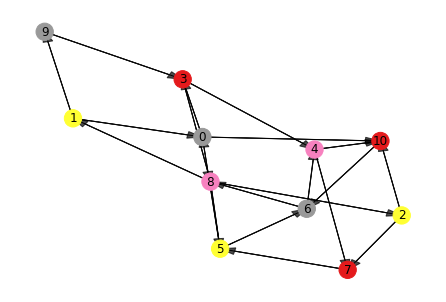

Graph 703 of size 11 is colorable with 6 colors


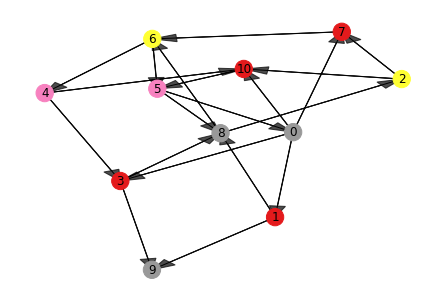

Graph 731 of size 11 is colorable with 6 colors


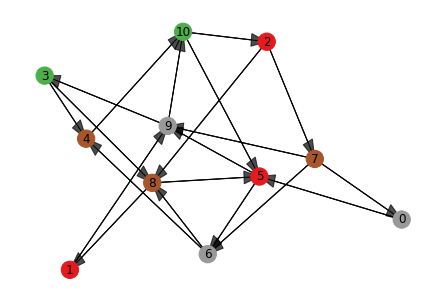

Graph 754 of size 11 is colorable with 6 colors


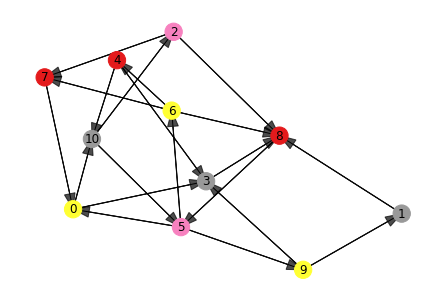

Graph 764 of size 11 is colorable with 6 colors


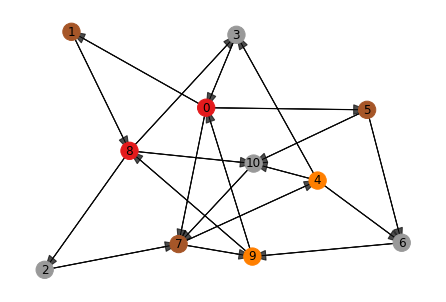

Graph 775 of size 11 is colorable with 6 colors


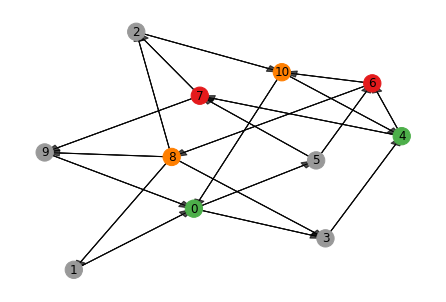

Graph 794 of size 11 is colorable with 6 colors


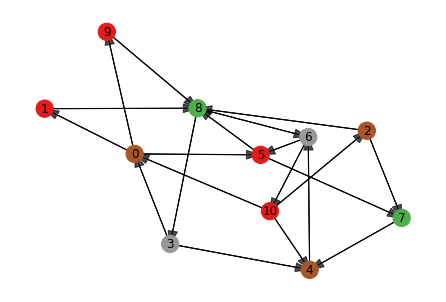

Graph 801 of size 11 is colorable with 6 colors


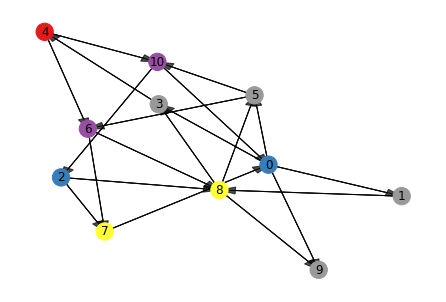

Graph 817 of size 11 is colorable with 6 colors


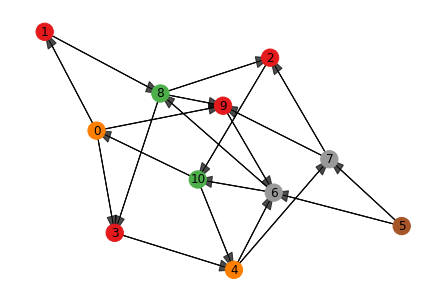

Graph 820 of size 11 is colorable with 6 colors


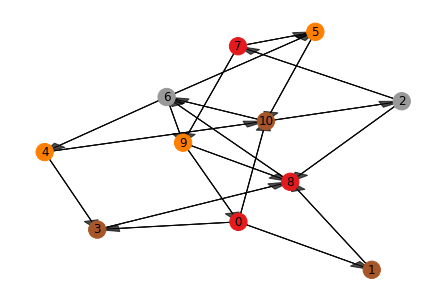

Graph 826 of size 11 is colorable with 6 colors


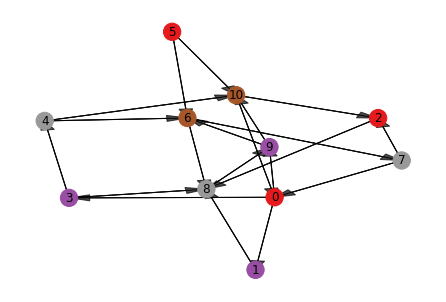

Graph 838 of size 11 is colorable with 6 colors


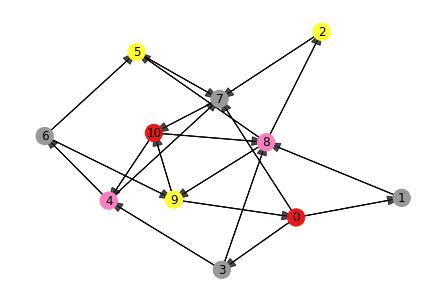

Graph 840 of size 11 is colorable with 6 colors


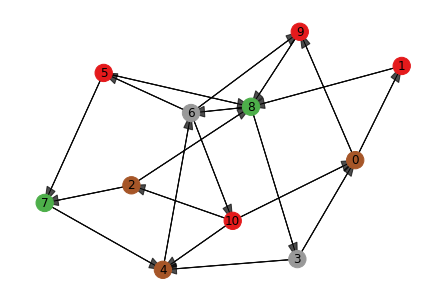

Graph 851 of size 11 is colorable with 6 colors


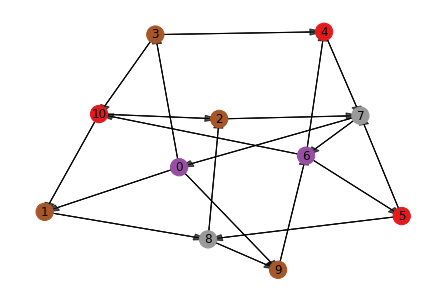

Graph 852 of size 11 is colorable with 6 colors


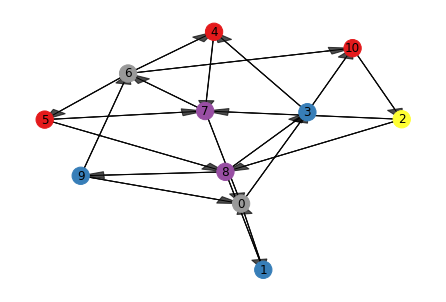

Graph 860 of size 11 is colorable with 6 colors


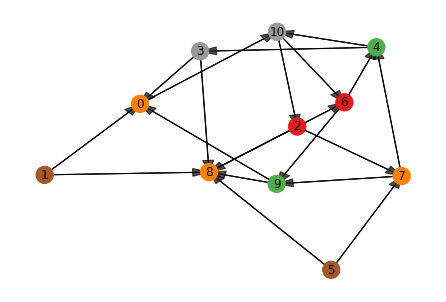

Graph 884 of size 11 is colorable with 6 colors


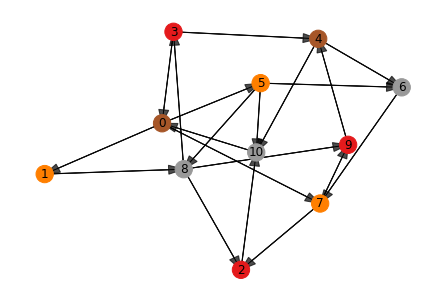

Graph 891 of size 11 is colorable with 6 colors


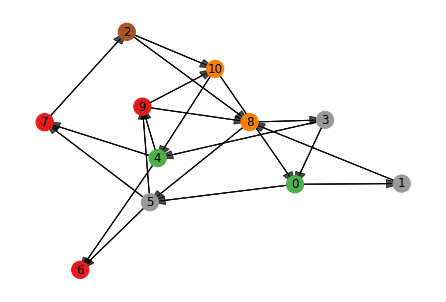

Graph 898 of size 11 is colorable with 6 colors


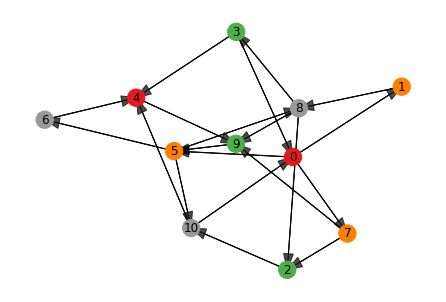

Graph 904 of size 11 is colorable with 6 colors


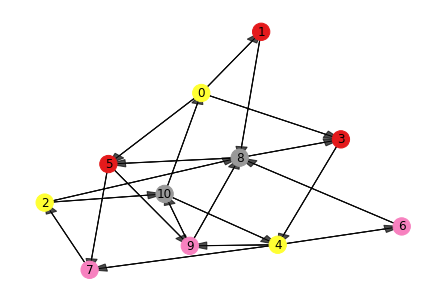

Graph 913 of size 11 is colorable with 6 colors


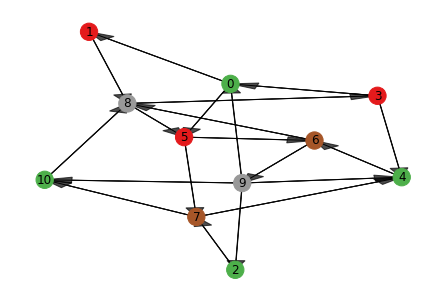

Graph 914 of size 11 is colorable with 6 colors


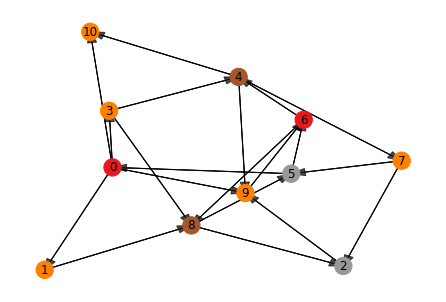

Graph 915 of size 11 is colorable with 6 colors


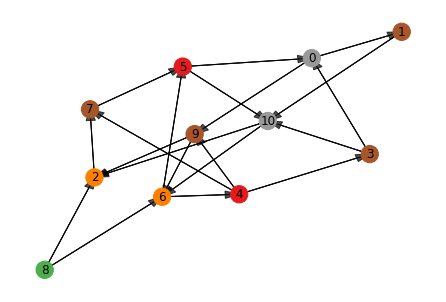

Graph 916 of size 11 is colorable with 6 colors


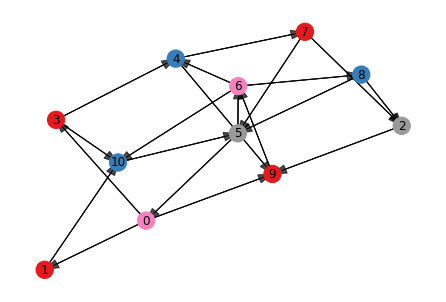

Graph 917 of size 11 is colorable with 6 colors


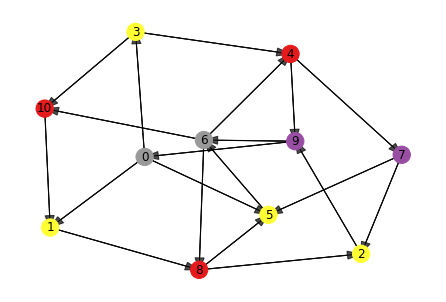

Graph 918 of size 11 is colorable with 6 colors


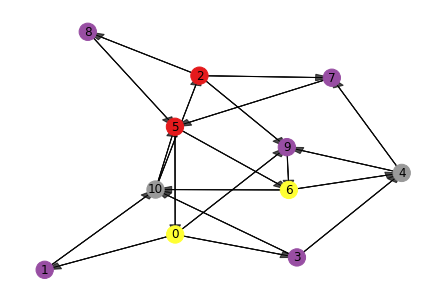

Graph 919 of size 11 is colorable with 6 colors


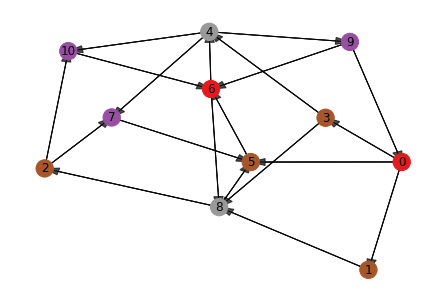

Graph 2157 of size 11 is colorable with 6 colors


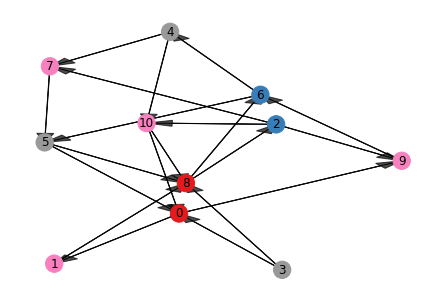

KeyboardInterrupt: 

In [45]:
colnum=6
for i in [4,5,6,7,8,9,10,11]:
    for g in range(len(collection[i]['graph_list'])):
        gr=collection[i]['graph_list'][g]
        adj={u:list(gr.neighbors(u)) for u in gr.nodes}
        coloring, orientation = check_coloring_orientation(adj, colnum)
        if coloring and orientation:
            print("Graph", g, "of size", i, "is colorable with", colnum, "colors")
            # Draw the graph with colors and orientations
            pos = nx.spring_layout(gr)
            node_colors = [coloring[v] for v in gr.nodes]
            nx.draw(gr, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Set1)
            # Draw oriented edges
            for (u, v) in gr.edges:
                if orientation.get((u, v), False):
                    plt.arrow(pos[u][0], pos[u][1], pos[v][0] - pos[u][0], pos[v][1] - pos[u][1],
                              length_includes_head=True, head_width=0.05, color='black', alpha=0.7)
                elif orientation.get((v, u), False):
                    plt.arrow(pos[v][0], pos[v][1], pos[u][0] - pos[v][0], pos[u][1] - pos[v][1],
                              length_includes_head=True, head_width=0.05, color='black', alpha=0.7)
            plt.show()
            
        else:
            pass
           # print("Graph",g,"of size",i,"is NOT colorable with",colnum,"colors")

In [39]:
2

2

In [38]:
for i in [4,5,6,7,8,9,10]:
    print(i,len(collection[i]['graph_list']))

4 1
5 1
6 4
7 14
8 58
9 266
10 1360


In [14]:
#vertices of tetra:
tc=(2**(1/2))/4

tetra_vert=[[tc,tc,tc],[-tc,-tc,tc],[-tc,tc,-tc],[tc,-tc,-tc]]

In [ ]:
def tetrahedron_volume(v1, v2, v3, v4):
    # Convert points to numpy arrays
    v1, v2, v3, v4 = map(np.array, (v1, v2, v3, v4))
    
    # Construct the matrix
    matrix = np.array([v2 - v1, v3 - v1, v4 - v1])
    
    # Compute volume
    volume = abs(np.linalg.det(matrix)) / 6.0
    return volume

In [24]:

#fixed graph
nbqp=collection[7]['nbqp_list'][13]

# cél és feltételek
def obj_maker(nbqp,miax):
        
    def objective(x):
        total=0
   #     for i,j in nbqp.diagonal_list():
   #         total=total+miax*((x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2)
      #      total=total+miax*((x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2)
        for i in list(nbqp.graph.nodes)[:-2]:
            total=total+((x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2-(x[3*i+3])**2-(x[3*i+4])**2-(x[3*i+5])**2)**2
        for i in list(nbqp.graph.nodes):
            total=total+((x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2)
        return total
        #return max([(x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2 for i in nbqp.graph.nodes])
    return objective

def consij(i,j):
    #print('ccc',i,j)
    return lambda x:(x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2-1
def cons_maker(nbqp):
    #equalities
    cons=[]
    for i,j in nbqp.graph.edges:
     #   print(i,j)    
        con = {'type': 'eq', 'fun': consij(i,j)}
        cons.append(con)

    #inequalites
    return cons


def constraint1(x):
    return x[0]**2+x[1]**2-10.0

def constraint2(x):
    return 4-x[0]*x[2]
#Kezdeti tipp
#Kezdeti tipp
def x0maker(nbqp):
    x0=[]
    for i in sorted(list(nbqp.graph.nodes)):
        x0.extend(tetra_vert[nbqp.coloring[i]])
    return x0

def x0maker_better(nbqp):
    x0=[]
    if nbqp.prevdata:
        prevnbqp,v,w1,w2=nbqp.prevdata
        xpermx=optthis(nbqp.prevdata[0]).x
        x0=list(xpermx)+list([xpermx[3*v+0],xpermx[3*v+1],xpermx[3*v+2] ])
        
    else:
        for i in sorted(list(nbqp.graph.nodes)):
            x0.extend(tetra_vert[nbqp.coloring[i]])
    return x0

def optthis(nbqp):    
    x0=np.array([2,3,4]) 
    
    miax=1
    #Kezdeti érték
    x0x0=x0maker_better(nbqp)
    print("Cél függvény értéke a kiindulási pontban:",obj_maker(nbqp,miax)(x0x0))
    # optimalizálás
    b = (-2.0,2.0)
    bnds = tuple([b]*nbqp.graph.number_of_nodes()*3)
    
    #solution = minimize(obj_maker(nbqp,miax),x0maker(nbqp),method='SLSQP',constraints=cons_maker(nbqp))
    solution = minimize(obj_maker(nbqp,miax),x0x0,bounds=bnds,method='SLSQP',constraints=cons_maker(nbqp),options={'maxiter':12000})
    
    x = solution.x
    
    # show final objective
    print('Cél függvény értéke: ' + str(obj_maker(nbqp,miax)(x)))
    
    # print solution
    print(solution.message)
    print('Optimális értékek:')
    print(x)
    return solution

34 3conn 3
NBQP graph:[(0, 1), (0, 5), (0, 3), (0, 7), (5, 6), (5, 3), (5, 7), (5, 4), (1, 4), (1, 8), (6, 7), (6, 8), (2, 7), (2, 4), (2, 8), (3, 8)] rotation:{0: (1, 5, 7, 3), 1: (4, 8, 0), 5: (0, 6, 3, 7, 4), 2: (8, 4, 7), 6: (7, 5, 8), 3: (0, 8, 5), 7: (5, 2, 6, 0), 4: (2, 5, 1), 8: (1, 3, 6, 2)} quads:{(0, 1, 4, 5), (3, 8, 6, 5), (0, 7, 5, 3), (1, 4, 2, 8), (0, 5, 6, 7), (2, 7, 6, 8), (2, 4, 5, 7), (0, 3, 8, 1)} cols:{0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3, 4: 0, 8: 0}
(NBQP graph:[(4, 1), (4, 5), (4, 2), (4, 6), (4, 3), (0, 1), (0, 5), (0, 3), (0, 7), (5, 6), (5, 3), (5, 7), (6, 7), (2, 7)] rotation:{0: (1, 5, 7, 3), 4: (3, 6, 2, 5, 1), 1: (4, 0), 5: (0, 6, 3, 7, 4), 2: (4, 7), 6: (7, 5, 4), 3: (0, 4, 5), 7: (5, 2, 6, 0)} quads:{(0, 3, 4, 1), (3, 4, 6, 5), (0, 1, 4, 5), (0, 7, 5, 3), (0, 5, 6, 7), (2, 4, 5, 7), (2, 7, 6, 4)} cols:{4: 0, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3}, 4, 2, 1)
16 [(0, 4), (0, 5), (0, 6), (0, 8), (4, 8), (4, 7), (3, 6), (3, 7), (3, 1), (6, 2), (5, 2),

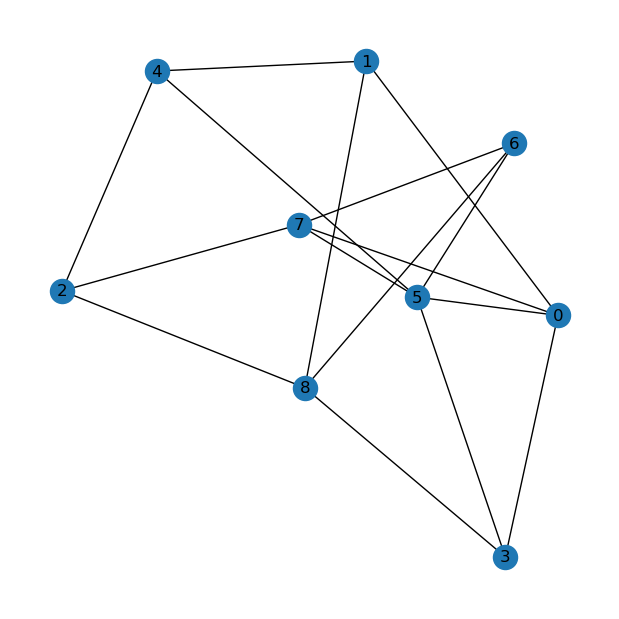

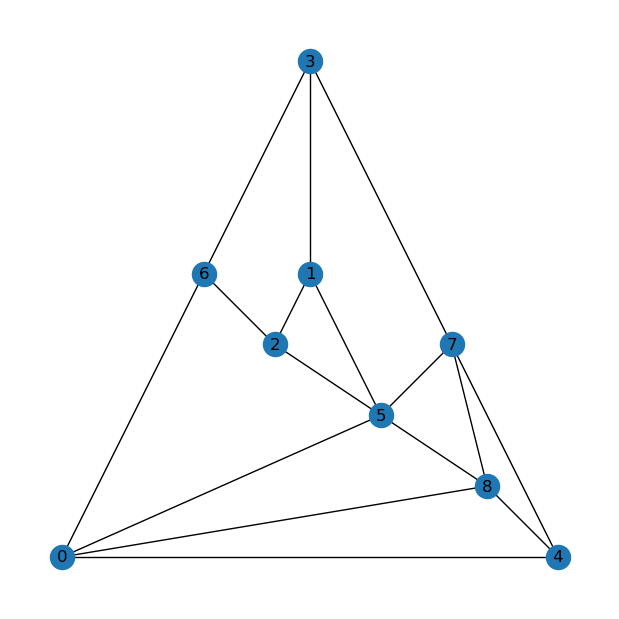

--------------------------------------------------
45 3conn 3
NBQP graph:[(0, 1), (0, 5), (0, 3), (0, 7), (5, 6), (5, 3), (5, 4), (1, 4), (1, 8), (6, 7), (6, 4), (6, 8), (2, 3), (2, 7), (2, 4), (3, 8)] rotation:{0: (1, 5, 7, 3), 1: (4, 8, 0), 5: (0, 6, 3, 4), 2: (4, 3, 7), 6: (7, 5, 8, 4), 3: (0, 8, 5, 2), 7: (2, 6, 0), 4: (6, 2, 5, 1), 8: (1, 3, 6)} quads:{(0, 1, 4, 5), (2, 4, 5, 3), (3, 8, 6, 5), (1, 4, 6, 8), (0, 7, 2, 3), (0, 5, 6, 7), (0, 3, 8, 1), (2, 7, 6, 4)} cols:{0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3, 4: 0, 8: 0}
(NBQP graph:[(4, 1), (4, 5), (4, 2), (4, 6), (4, 3), (0, 1), (0, 5), (0, 3), (0, 7), (5, 6), (5, 3), (6, 7), (2, 3), (2, 7)] rotation:{0: (1, 5, 7, 3), 4: (3, 6, 2, 5, 1), 1: (4, 0), 5: (0, 6, 3, 4), 2: (4, 3, 7), 6: (7, 5, 4), 3: (0, 4, 5, 2), 7: (2, 6, 0)} quads:{(0, 3, 4, 1), (3, 4, 6, 5), (0, 1, 4, 5), (2, 4, 5, 3), (0, 7, 2, 3), (0, 5, 6, 7), (2, 7, 6, 4)} cols:{4: 0, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3}, 4, 6, 1)
16 [(0, 4), (0, 2), (0, 6), (0, 8), (4, 

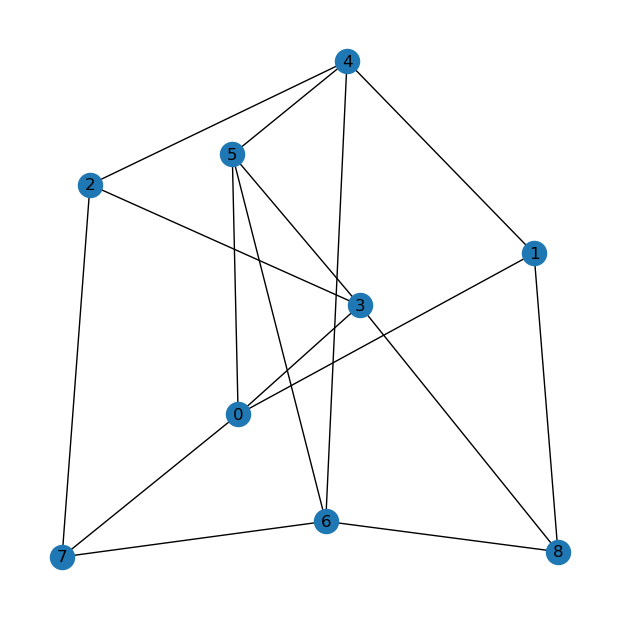

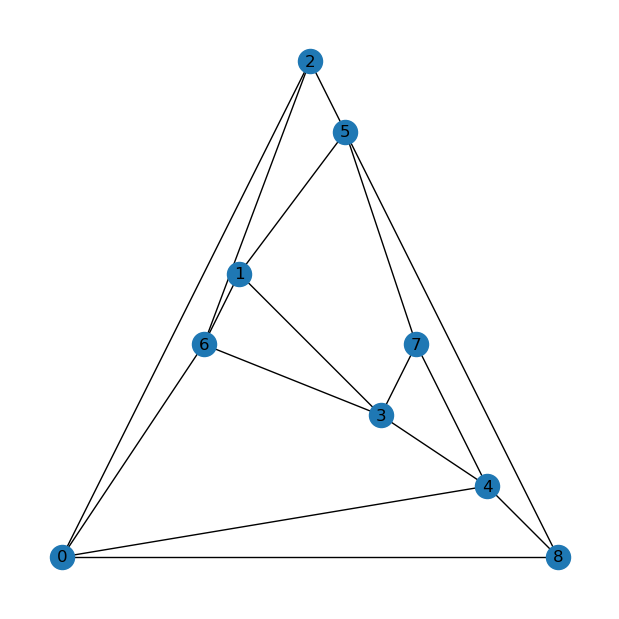

--------------------------------------------------
97 3conn 3
NBQP graph:[(0, 1), (0, 5), (0, 7), (5, 6), (5, 3), (5, 4), (1, 4), (1, 8), (6, 3), (6, 7), (6, 8), (2, 3), (2, 4), (2, 8), (3, 8), (7, 8)] rotation:{0: (1, 5, 7), 1: (4, 8, 0), 5: (0, 6, 3, 4), 2: (8, 4, 3), 6: (3, 7, 5, 8), 3: (8, 5, 2, 6), 7: (6, 0, 8), 4: (2, 5, 1), 8: (1, 7, 3, 6, 2)} quads:{(0, 7, 8, 1), (0, 1, 4, 5), (2, 4, 5, 3), (3, 8, 6, 5), (3, 6, 7, 8), (2, 3, 6, 8), (1, 4, 2, 8), (0, 5, 6, 7)} cols:{0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3, 4: 0, 8: 0}
(NBQP graph:[(4, 1), (4, 5), (4, 2), (4, 6), (4, 3), (4, 7), (0, 1), (0, 5), (0, 7), (5, 6), (5, 3), (6, 3), (6, 7), (2, 3)] rotation:{0: (1, 5, 7), 4: (7, 3, 6, 2, 5, 1), 1: (4, 0), 5: (0, 6, 3, 4), 2: (4, 3), 6: (3, 7, 5, 4), 3: (4, 5, 2, 6), 7: (6, 0, 4)} quads:{(3, 4, 6, 5), (0, 1, 4, 5), (2, 4, 5, 3), (0, 7, 4, 1), (3, 6, 7, 4), (0, 5, 6, 7), (2, 3, 6, 4)} cols:{4: 0, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3}, 4, 2, 1)
16 [(0, 8), (0, 4), (0, 6), (8, 5), (8, 

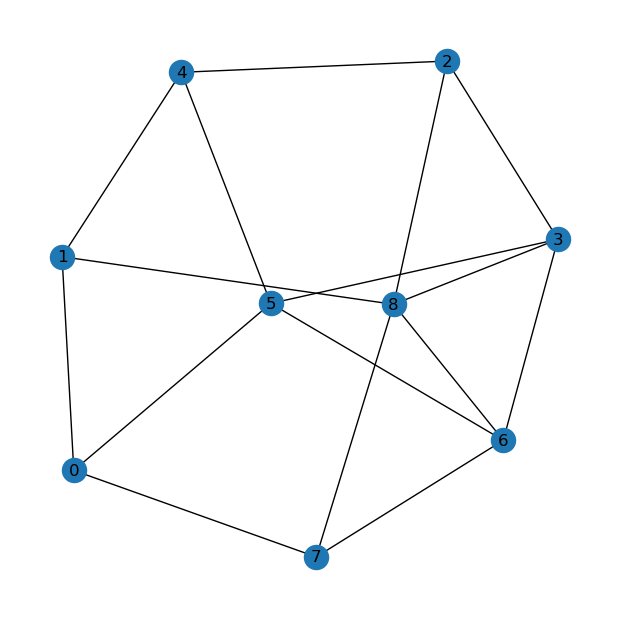

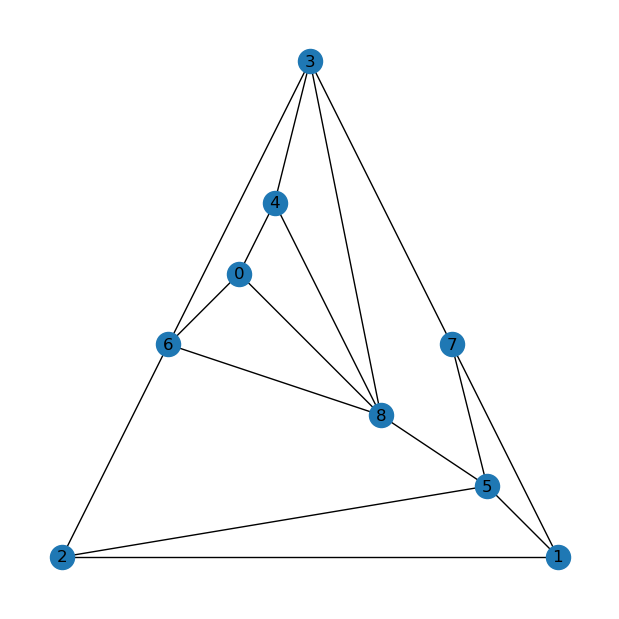

--------------------------------------------------
133 3conn 3
NBQP graph:[(3, 0), (3, 5), (3, 2), (3, 6), (3, 4), (3, 8), (0, 1), (0, 5), (5, 6), (5, 7), (1, 7), (1, 8), (6, 4), (2, 4), (2, 7), (2, 8)] rotation:{3: (0, 8, 4, 5, 2, 6), 0: (1, 5, 3), 1: (7, 8, 0), 5: (0, 6, 3, 7), 2: (4, 8, 7, 3), 6: (3, 5, 4), 4: (3, 6, 2), 7: (2, 5, 1), 8: (1, 3, 2)} quads:{(3, 4, 6, 5), (0, 1, 7, 5), (2, 4, 3, 8), (1, 7, 2, 8), (2, 7, 5, 3), (2, 3, 6, 4), (0, 5, 6, 3), (0, 3, 8, 1)} cols:{3: 3, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 4: 0, 7: 0, 8: 0}
(NBQP graph:[(3, 0), (3, 5), (3, 2), (3, 6), (3, 4), (3, 7), (0, 1), (0, 5), (5, 6), (5, 7), (1, 7), (6, 4), (2, 4), (2, 7)] rotation:{3: (0, 7, 4, 5, 2, 6), 0: (1, 5, 3), 1: (7, 0), 5: (0, 6, 3, 7), 2: (4, 7, 3), 6: (3, 5, 4), 4: (3, 6, 2), 7: (2, 5, 1, 3)} quads:{(3, 4, 6, 5), (2, 7, 5, 3), (2, 3, 6, 4), (2, 4, 3, 7), (0, 3, 7, 1), (0, 5, 6, 3), (0, 1, 7, 5)} cols:{3: 3, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 4: 0, 7: 0}, 7, 2, 1)
16 [(3, 6), (3, 2), (3, 7), (3, 4), (3,

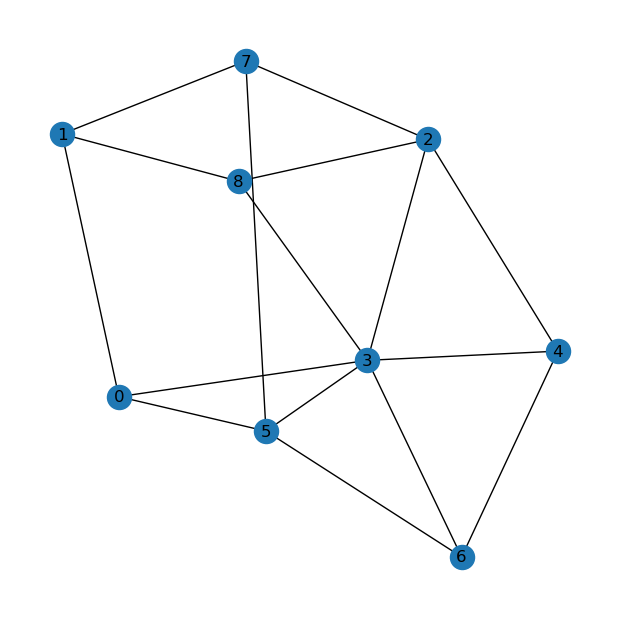

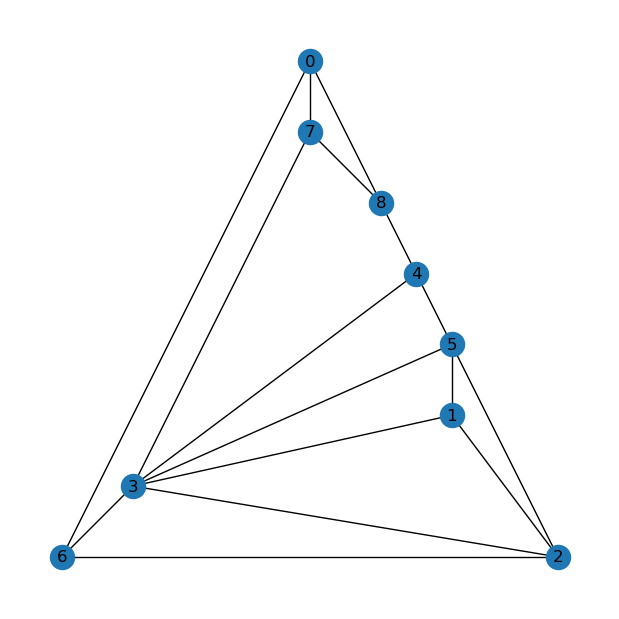

--------------------------------------------------


In [16]:
for i,nbqp in enumerate(collection[9]['nbqp_list']):
    digr=nx.Graph()
    digr.add_edges_from(nbqp.diagonal_list())
    if nx.node_connectivity(digr)>2:
        G=nbqp.graph
        
        #nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
        #optthis(nbqp)
        print(i,"3conn",nx.node_connectivity(digr))
       
        DG=nbqp.diag_graph()
        #nx.draw(DG,pos=nx.spring_layout(DG),with_labels=True)

        print(nbqp)
        print(nbqp.prevdata)
        print(len(DG.edges),DG.edges)
        print("trigs",nx.triangles(G))
        plt.figure(figsize=(6, 6))  
        nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
        plt.show()  # Show the current figure and start a new one for the next graph
        
        plt.figure(figsize=(6, 6))  
        nx.draw(DG, pos=nx.planar_layout(DG), with_labels=True)
        #plt.title(f"Graph {i}")  # Add a title for clarity
        plt.show()  # Show the current figure and start a new one for the next graph
        
        print("--------------------------------------------------")

(NBQP graph:[(4, 1), (4, 5), (4, 2), (4, 6), (4, 3), (4, 7), (0, 1), (0, 5), (0, 7), (5, 6), (5, 3), (6, 3), (6, 7), (2, 3)] rotation:{0: (1, 5, 7), 4: (7, 3, 6, 2, 5, 1), 1: (4, 0), 5: (0, 6, 3, 4), 2: (4, 3), 6: (3, 7, 5, 4), 3: (4, 5, 2, 6), 7: (6, 0, 4)} quads:{(3, 4, 6, 5), (0, 1, 4, 5), (2, 4, 5, 3), (0, 7, 4, 1), (3, 6, 7, 4), (0, 5, 6, 7), (2, 3, 6, 4)} cols:{4: 0, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3}, 4, 3, 6)


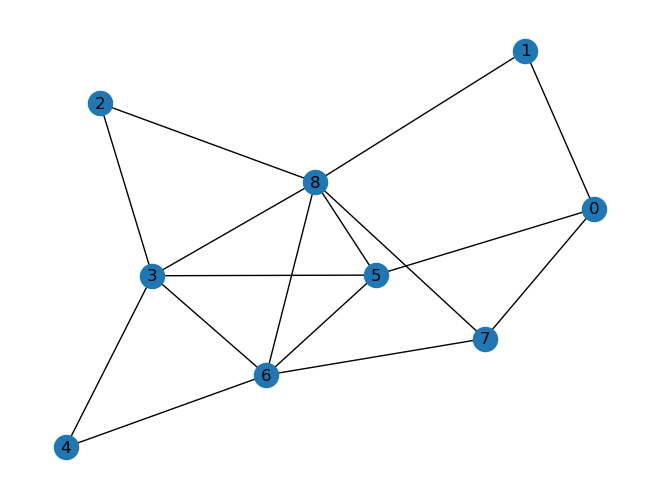

In [17]:
nbqp=collection[9]["nbqp_list"][91]
#144356
G=nbqp.graph
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
print(nbqp.prevdata)

In [42]:
nbqp=collection[9]['nbqp_list'][45]
solution=optthis(nbqp)
x = solution.x

Cél függvény értéke a kiindulási pontban: 1.5000000000000004
Cél függvény értéke: 1.5000000000000004
Optimization terminated successfully
Optimális értékek:
[ 0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339]
Cél függvény értéke a kiindulási pontban: 1.8750000000000004
Cél függvény értéke: 1.737149904421877
Optimization terminated successfully
Optimális értékek:
[ 0.06379257  0.45171544  0.07719809 -0.42148656 -0.39331775  0.30174933
 -0.32658247  0.39219678 -0.30977351  0.28262071 -0.39466762 -0.408343
  0.37151625  0.21048647  0.38278667]
Cél függvény értéke a kiindulási pontban: 2.2088244914751733
Cél függvény értéke: 2.0006464191607196
Optimization terminated successfully
Optimális értékek:
[ 0.15059331  0.48465441  0.02325161 -0.14849391 -0.46834503 -0.02511085
 -0.27392266  0.42283696 -0.34111451  0.24176303 -0.43368899 -0.36188927
  0.44157644  0.25342273  0.33664641 -0.41416531 -0.262

In [43]:
nbqp.prevdata

(NBQP graph:[(4, 1), (4, 5), (4, 2), (4, 6), (4, 3), (0, 1), (0, 5), (0, 3), (0, 7), (5, 6), (5, 3), (6, 7), (2, 3), (2, 7)] rotation:{0: (1, 5, 7, 3), 4: (3, 6, 2, 5, 1), 1: (4, 0), 5: (0, 6, 3, 4), 2: (4, 3, 7), 6: (7, 5, 4), 3: (0, 4, 5, 2), 7: (2, 6, 0)} quads:{(0, 3, 4, 1), (3, 4, 6, 5), (0, 1, 4, 5), (2, 4, 5, 3), (0, 7, 2, 3), (0, 5, 6, 7), (2, 7, 6, 4)} cols:{4: 0, 0: 0, 5: 1, 1: 1, 6: 2, 2: 2, 3: 3, 7: 3},
 4,
 6,
 1)

In [44]:
print("l={")
for i in range(len(x)//3):
    #points = {(1,2), (3,4), (5,6)}
    print("(",x[i*3+0],",",x[3*i+1],",",x[i*3+2],")")
    if i<(len(x)//3)-1:
        print(",")
print("}")
print("ed={")
 
for i,j in nbqp.graph.edges:
    print("Segment(")
    print("(",x[i*3+0],",",x[3*i+1],",",x[i*3+2],"),")
    print("(",x[j*3+0],",",x[3*j+1],",",x[j*3+2],")")
    print("),")
print("}")


l={
( 0.08293462099728766 , 0.5535053492168377 , 0.06472897128916275 )
,
( -0.2931922385495639 , -0.2938804693919039 , -0.3100587845046067 )
,
( -0.40393629857906743 , 0.318408554079654 , 0.03995855331910802 )
,
( 0.22495918184861427 , -0.3132372316875167 , -0.4133780553895243 )
,
( 0.5489387062741657 , 0.026781193878914884 , 0.12352117183955381 )
,
( -0.36425633120260903 , -0.27818453198153237 , 0.3938371535881693 )
,
( -0.23483591347011176 , 0.20755560999254277 , -0.47063197384863836 )
,
( 0.25391560453676604 , -0.42992576290527706 , 0.1249681051631511 )
,
( 0.14645269567848723 , 0.17925490678502645 , 0.45339078928324816 )
}
ed={
Segment(
( 0.08293462099728766 , 0.5535053492168377 , 0.06472897128916275 ),
( -0.2931922385495639 , -0.2938804693919039 , -0.3100587845046067 )
),
Segment(
( 0.08293462099728766 , 0.5535053492168377 , 0.06472897128916275 ),
( -0.36425633120260903 , -0.27818453198153237 , 0.3938371535881693 )
),
Segment(
( 0.08293462099728766 , 0.5535053492168377 , 0.0647289

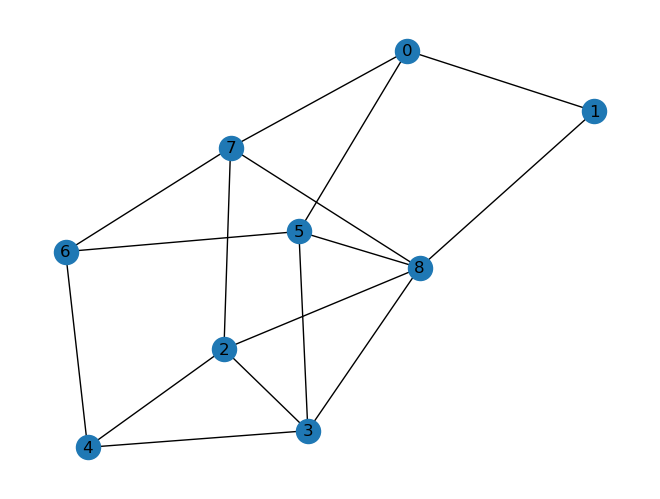

In [62]:
nbqp=collection[9]["nbqp_list"][91]
#144356
G=nbqp.graph
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)

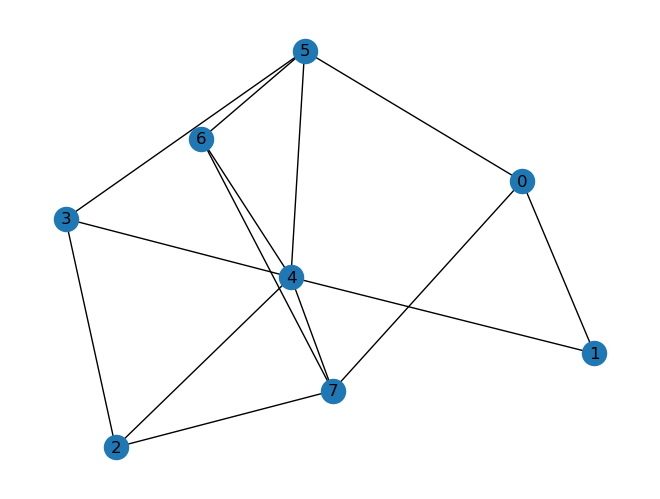

In [128]:
nbqp=collection[8]["nbqp_list"][5]
#144356
G=nbqp.graph
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)
dg=nx.Graph()
dg.add_edges_from(nbqp.diagonal_list())


In [131]:
nx.node_connectivity(dg)

2

In [129]:
dg.edges

EdgeView([(2, 4), (2, 5), (2, 6), (2, 0), (4, 0), (4, 6), (4, 3), (4, 5), (4, 7), (0, 6), (5, 1), (5, 7), (3, 6), (3, 7), (7, 1)])

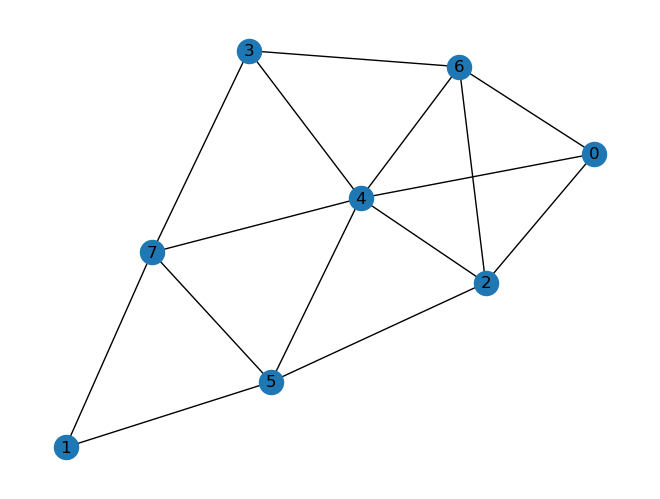

In [130]:
nx.draw(dg,pos=nx.spring_layout(dg),with_labels=True)

In [133]:
nbqp.compute_quads()

{(0, 1, 4, 5),
 (0, 4, 2, 7),
 (0, 5, 6, 7),
 (0, 7, 4, 1),
 (0, 7, 6, 1),
 (2, 3, 4, 7),
 (2, 4, 5, 3),
 (2, 7, 6, 4),
 (3, 4, 6, 5),
 (4, 5, 6, 7)}

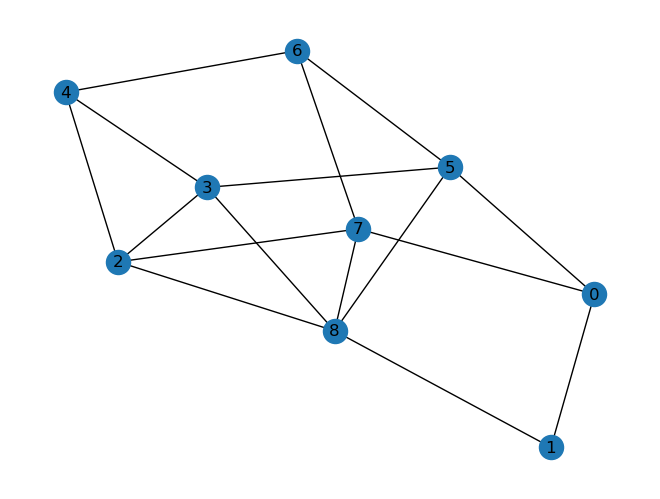

In [114]:
nbqp=collection[9]["nbqp_list"][91]
#34 45 91
G=nbqp.graph
nx.draw(G,pos=nx.spring_layout(G),with_labels=True)

In [265]:
nbqp.diagonal_list()

[(0, 4),
 (2, 3),
 (0, 4),
 (2, 5),
 (0, 2),
 (3, 1),
 (5, 4),
 (1, 5),
 (4, 3),
 (5, 3)]

In [30]:
list(solution.x)

[0.08293462099728766,
 0.5535053492168377,
 0.06472897128916275,
 -0.2931922385495639,
 -0.2938804693919039,
 -0.3100587845046067,
 -0.40393629857906743,
 0.318408554079654,
 0.03995855331910802,
 0.22495918184861427,
 -0.3132372316875167,
 -0.4133780553895243,
 0.5489387062741657,
 0.026781193878914884,
 0.12352117183955381,
 -0.36425633120260903,
 -0.27818453198153237,
 0.3938371535881693,
 -0.23483591347011176,
 0.20755560999254277,
 -0.47063197384863836,
 0.25391560453676604,
 -0.42992576290527706,
 0.1249681051631511,
 0.14645269567848723,
 0.17925490678502645,
 0.45339078928324816]

In [ ]:
nbqp.diagonal_list

In [58]:

def consij(i,j):
    #print('ccc',i,j)
    return lambda x:(x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2-1

def consijlower(i,j,t):
    #print('ccc',i,j)
    return lambda x:(x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2-t

def ncons_maker(nbqp):
    #equalities
    cons=[]
    for i,j in nbqp.graph.edges:
     #   print(i,j)    
        con = {'type': 'eq', 'fun': consij(i,j)}
        cons.append(con)
    for i,j in nbqp.diagonal_list():
        conb = {'type': 'ineq', 'fun': consijlower(i,j,0.0001)}
        cons.append(conb)

    #inequalites
    return cons

In [59]:
def nobj_maker(nbqp,miax):
        
    def objective(x):
        total=0
   #     for i,j in nbqp.diagonal_list():
   #         total=total+miax*((x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2)
      #      total=total+miax*((x[3*i+0]-x[3*j+0])**2+(x[3*i+1]-x[3*j+1])**2+(x[3*i+2]-x[3*j+2])**2)
        for i in list(nbqp.graph.nodes)[:-2]:
            total=total+((x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2-(x[3*i+3])**2-(x[3*i+4])**2-(x[3*i+5])**2)**2
        #for i in list(nbqp.graph.nodes):
        #    total=total+((x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2)
        return total
        #return max([(x[3*i+0])**2+(x[3*i+1])**2+(x[3*i+2])**2 for i in nbqp.graph.nodes])
    return objective

nnbqp=collection[9]['nbqp_list'][45]

miax=1
#Kezdeti érték
#x0x0=x0maker_better(nnbqp)
nx0x0=list(solution.x)
print("Cél függvény értéke a kiindulási pontban:",nobj_maker(nnbqp,miax)(x0x0))
# optimalizálás
b = (-2.0,2.0)
bnds = tuple([b]*nbqp.graph.number_of_nodes()*3)

#solution = minimize(obj_maker(nbqp,miax),x0maker(nbqp),method='SLSQP',constraints=cons_maker(nbqp))
nsolution = minimize(nobj_maker(nnbqp,miax),nx0x0,bounds=bnds,method='SLSQP',constraints=ncons_maker(nnbqp),options={'maxiter':12000})

x = nsolution.x

# show final objective
print('Cél függvény értéke: ' + str(nobj_maker(nnbqp,miax)(x)))

# print solution
print(nsolution.message)
print('Optimális értékek:')
print(x)


Cél függvény értéke a kiindulási pontban: 0.010369106505136625
Cél függvény értéke: 1.0250731911657612e-05
Optimization terminated successfully
Optimális értékek:
[ 0.32355161  0.48173678  0.00324589 -0.26547011 -0.15724487 -0.49148228
 -0.44060199  0.37553413  0.03974171  0.02732254 -0.3541375  -0.45888235
  0.54244302  0.20445177 -0.02623817 -0.19709592 -0.20920273  0.5047723
 -0.27008397 -0.14783019 -0.49067042  0.07473067 -0.39498913  0.41487658
 -0.191399   -0.20098424  0.50481106]


In [60]:
print("l={")
for i in range(len(x)//3):
    #points = {(1,2), (3,4), (5,6)}
    print("(",x[i*3+0],",",x[3*i+1],",",x[i*3+2],")")
    if i<(len(x)//3)-1:
        print(",")
print("}")
print("ed={")
 
for i,j in nbqp.graph.edges:
    print("Segment(")
    print("(",x[i*3+0],",",x[3*i+1],",",x[i*3+2],"),")
    print("(",x[j*3+0],",",x[3*j+1],",",x[j*3+2],")")
    print("),")
print("}")


l={
( 0.3235516135477321 , 0.48173678375781936 , 0.003245894028595251 )
,
( -0.2654701053776582 , -0.1572448676925684 , -0.49148228190609416 )
,
( -0.4406019919970894 , 0.37553412537758646 , 0.03974171151455806 )
,
( 0.02732253741874909 , -0.35413750416463097 , -0.4588823483438954 )
,
( 0.5424430201577998 , 0.20445177370623646 , -0.026238170802821786 )
,
( -0.19709592316086572 , -0.2092027317842035 , 0.5047722977308696 )
,
( -0.2700839731701884 , -0.14783019199732922 , -0.4906704242557773 )
,
( 0.07473067120576932 , -0.3949891264840349 , 0.4148765763278513 )
,
( -0.1913989972630316 , -0.2009842424312139 , 0.5048110574356601 )
}
ed={
Segment(
( 0.3235516135477321 , 0.48173678375781936 , 0.003245894028595251 ),
( -0.2654701053776582 , -0.1572448676925684 , -0.49148228190609416 )
),
Segment(
( 0.3235516135477321 , 0.48173678375781936 , 0.003245894028595251 ),
( -0.19709592316086572 , -0.2092027317842035 , 0.5047722977308696 )
),
Segment(
( 0.3235516135477321 , 0.48173678375781936 , 0.0032

In [41]:
nnbqp.graph